In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tor = pd.read_csv("1950-2023_actual_tornadoes.csv")

midwest = ["IL", "IA", "IN", "KS", "MI", "MN", "NE", "MO", "ND", "OH", "SD", "WI"]
tor_mw = tor[tor.st.isin(midwest)]
tor_mw

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
6,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,...,18.80,50,1,1,1,119,117,0,0,0
7,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,...,18.00,200,1,1,1,119,5,0,0,0
9,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,...,9.60,50,1,1,1,157,0,0,0,0
11,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,2.30,300,1,1,1,93,0,0,0,0
12,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,0.10,100,1,1,1,91,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70012,623323,2023,9,23,2023-09-23,15:50:00,3,SD,46,0,...,0.01,10,1,1,1,11,0,0,0,0
70013,623324,2023,9,25,2023-09-25,17:10:00,3,WI,55,0,...,0.04,25,1,1,1,45,0,0,0,0
70015,623326,2023,9,26,2023-09-26,14:15:00,3,IA,19,0,...,0.10,20,1,1,1,11,0,0,0,0
70018,623329,2023,9,28,2023-09-28,13:40:00,3,OH,39,0,...,0.01,25,1,1,1,97,0,0,0,0


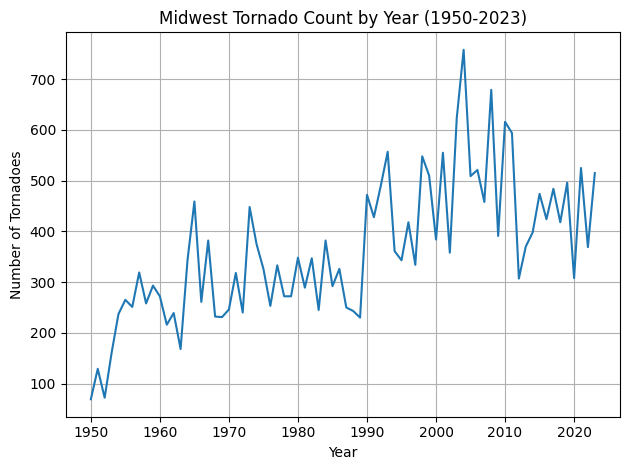

In [ ]:
tor_mw_by_year = tor_mw.groupby('yr').size().reset_index(name='count')

plt.plot(tor_mw_by_year['yr'], tor_mw_by_year['count'])

plt.title("Midwest Tornado Count by Year (1950-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.grid()

plt.tight_layout()
plt.show()

/tmp/ipykernel_2039/2772119443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor_mw['period'] = pd.cut(
/tmp/ipykernel_2039/2772119443.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['mo'].apply(get_season)
/tmp/ipykernel_2039/2772119443.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

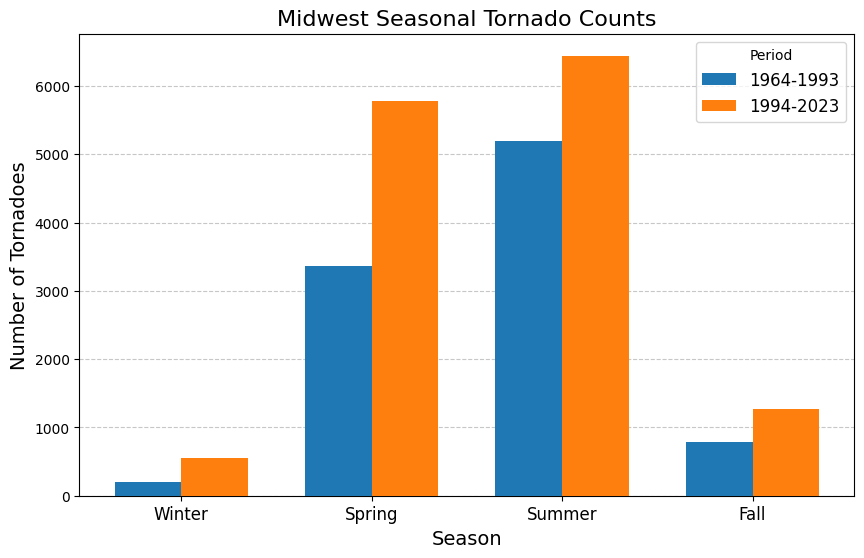

In [16]:
tor_mw['period'] = pd.cut(
    tor_mw['yr'],
    bins=[1964, 1993, 2023],
    labels=['1964-1993', '1994-2023'],
    right=True
)

filtered_data = tor_mw[tor_mw['period'].notnull()]

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

filtered_data['season'] = filtered_data['mo'].apply(get_season)

seasonal_counts_30yr = filtered_data.groupby(['period', 'season']).size().reset_index(name='count')

pivot_data_30yr = seasonal_counts_30yr.pivot(index='season', columns='period', values='count').fillna(0)

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
pivot_data_30yr = pivot_data_30yr.reindex(season_order)

categories = pivot_data_30yr.index
periods = pivot_data_30yr.columns
data_values = pivot_data_30yr.values

x = np.arange(len(categories))
bar_width = 0.35
offsets = [-bar_width / 2, bar_width / 2]

plt.figure(figsize=(10, 6))

for i, period in enumerate(periods):
    plt.bar(
        x + offsets[i],
        data_values[:, i],
        width=bar_width,
        label=period,
        zorder = 5
    )

plt.title('Midwest Seasonal Tornado Counts', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Tornadoes', fontsize=14)
plt.xticks(x, categories, fontsize=12)
plt.legend(title='Period', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_2039/684871289.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


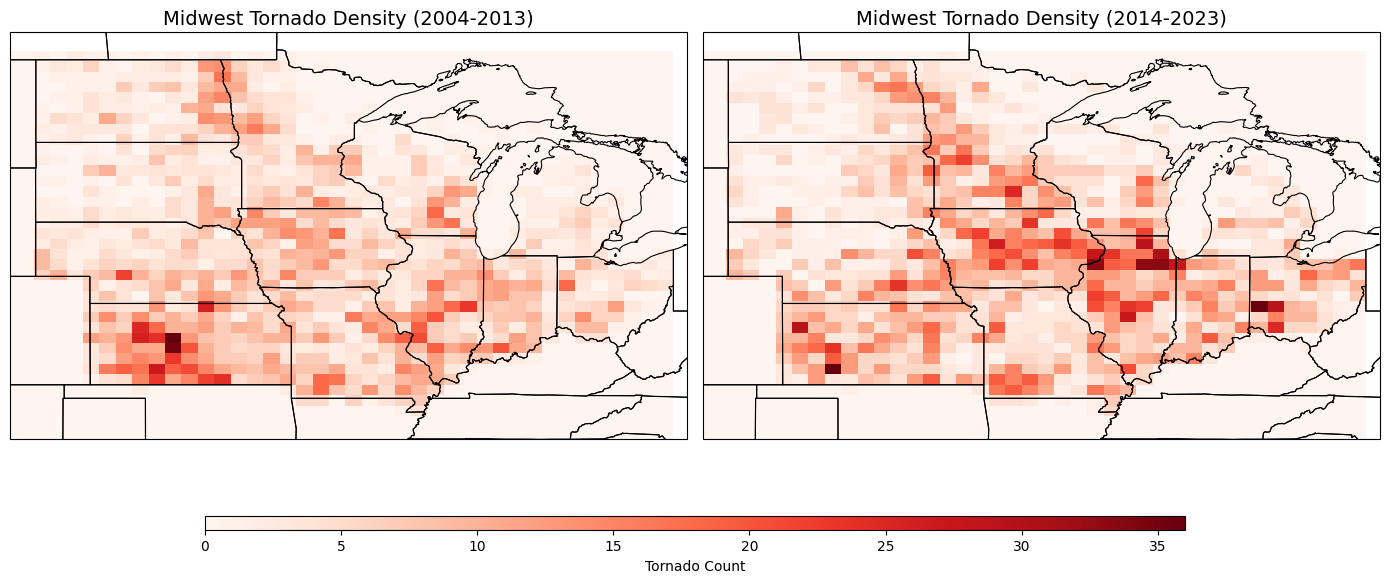

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data_2004_2013 = tor_mw[(tor_mw['yr'] >= 2004) & (tor_mw['yr'] <= 2013)]
data_2014_2023 = tor_mw[(tor_mw['yr'] >= 2014) & (tor_mw['yr'] <= 2023)]

lon_bins = np.linspace(tor_mw['slon'].min(), tor_mw['slon'].max(), 50)
lat_bins = np.linspace(tor_mw['slat'].min(), tor_mw['slat'].max(), 50)

hist_2004_2013, lon_edges, lat_edges = np.histogram2d(
    data_2004_2013['slon'], data_2004_2013['slat'], bins=[lon_bins, lat_bins]
)
hist_2014_2023, _, _ = np.histogram2d(
    data_2014_2023['slon'], data_2014_2023['slat'], bins=[lon_bins, lat_bins]
)

fig, axes = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})

def plot_density(ax, hist, lon_edges, lat_edges, title):
    im = ax.pcolormesh(lon_edges, lat_edges, hist.T, cmap='Reds', shading='auto')
    ax.set_extent([-105, -80, 35, 50], crs=ccrs.PlateCarree())  # Approx Midwest bounds
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black', linewidth=0.8)
    ax.set_title(title, fontsize=14)
    return im

im1 = plot_density(axes[0], hist_2004_2013, lon_edges, lat_edges, 'Midwest Tornado Density (2004-2013)')

im2 = plot_density(axes[1], hist_2014_2023, lon_edges, lat_edges, 'Midwest Tornado Density (2014-2023)')

cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.02])
fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', label='Tornado Count')

plt.tight_layout()
plt.show()